<a href="https://colab.research.google.com/github/Imadeddine503/meshing_python/blob/main/cube_mesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Now that we understood what it is like to create a 2D mesh in the casee of a rectangle and a circle, we will move on with 3D-meshing a cube. The principle seems to be the same. Its name will hwever change from triangular to tetrahedric.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters:

length = 2
n = 10

# Generate nodes
x = np.linspace(0, length, n + 1)
y = np.linspace(0, length, n + 1)
z = np.linspace(0, length, n + 1)
nodes = [(i, j, k) for k in z for j in y for i in x]


# Generate elements (tetrahedric mesh)
elements = []
for k in range(n):
  for j in range(n):
    for i in range(n):
        n1 = k * (n + 1)**2 + j * (n + 1) + i
        n2 = k * (n + 1)**2 + j * (n + 1) + i + 1
        n3 = k * (n + 1)**2 + (j + 1) * (n + 1) + i
        n4 = k * (n + 1)**2 + (j + 1) * (n + 1) + i + 1
        n5 = (k + 1) * (n + 1)**2 + j * (n + 1) + i
        n6 = (k + 1) * (n + 1)**2 + j * (n + 1) + i + 1
        n7 = (k + 1) * (n + 1)**2 + (j + 1) * (n + 1) + i
        n8 = (k + 1) * (n + 1)**2 + (j + 1) * (n + 1) + i + 1

        elements.append([n1,n2,n3,n5])
        elements.append([n2,n3,n4,n8])
        elements.append([n3,n5,n7,n8])
        elements.append([n2,n5,n6,n8])


# Convert to NumPy arrays
nodes = np.array(nodes)
elements = np.array(elements)

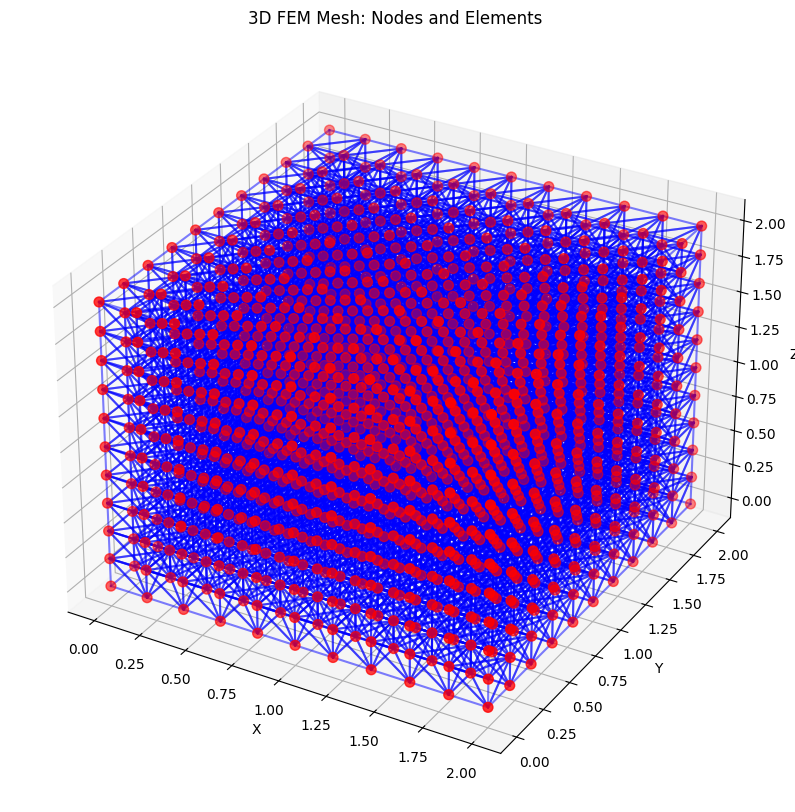

In [10]:
# Create the plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the elements (edges)
for element in elements:
    node1,node2,node3,node4 = nodes[element[0]], nodes[element[1]], nodes[element[2]], nodes[element[3]]
    ax.plot([node1[0], node2[0]], [node1[1], node2[1]], [node1[2], node2[2]], 'b-', alpha=0.5)  # Line between n1 and n2
    ax.plot([node1[0], node3[0]], [node1[1], node3[1]], [node1[2], node3[2]], 'b-', alpha=0.5)  # Line between n1 and n3
    ax.plot([node1[0], node4[0]], [node1[1], node4[1]], [node1[2], node4[2]], 'b-', alpha=0.5)  # Line between n1 and n4
    ax.plot([node2[0], node3[0]], [node2[1], node3[1]], [node2[2], node3[2]], 'b-', alpha=0.5)  # Line between n2 and n3
    ax.plot([node2[0], node4[0]], [node2[1], node4[1]], [node2[2], node4[2]], 'b-', alpha=0.5)  # Line between n2 and n4
    ax.plot([node3[0], node4[0]], [node3[1], node4[1]], [node3[2], node4[2]], 'b-', alpha=0.5)  # Line between n3 and n4


# Plot the nodes
ax.scatter(nodes[:, 0], nodes[:, 1], nodes[:, 2], color='r', s=50)  # Red points for nodes

# Labels and title
ax.set_title("3D FEM Mesh: Nodes and Elements")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

The formula for element centre is as straightforward as can be. The tetrahedron volume formula is calculated by:


1.   Calculating the surface of one of the tetrahedron faces, using: **S_uv** = vect(**DA**,**DB**)
2.   Determining the volume using:   Volume = **S_uv**.**w**/4  .

The total volume calculated by this method will be approximative.



In [16]:
n_elements = np.shape(elements)[0]

meshsize = np.zeros(n_elements)
meshcentre = np.zeros((n_elements, 3))

for i in range(n_elements):
  ele = elements[i,:]
  xA, yA, zA = nodes[ele[0]]
  xB, yB, zB = nodes[ele[1]]
  xC, yC, zC = nodes[ele[2]]
  xD, yD, zD = nodes[ele[3]]

  u = [xA - xD, yA - yD, zA - zD]
  v = [xB - xD, yB - yD, zB - zD]
  w = [xC - xD, yC - yD, zC - zD]

  uv = [u[1]*v[2] - v[1]*u[2],    v[0]*u[2] - u[0]*v[2],   u[0]*v[1] - u[1]*v[0]]   # Produit vectoriel entre u et v
  V_uvw = abs( uv[0]*w[0] + uv[1]*w[1] + uv[2]*w[2])      # Volume du parraléllipipède formé par u,v et w
  meshsize[i] = V_uvw/4


  meshcentre[i,0] = (xA + xB + xC + xD)/4
  meshcentre[i,1] = (yA + yB + yC + yD)/4
  meshcentre[i,2] = (zA + zB + zC + zD)/4



#print("Elements size (index, size):")
#for idx, elem in enumerate(meshsize):
#    print(f"{idx}: {elem}")
print("Volume: "+ str(int(100*length**3)/100))
print("Calculated volume:  "+ str(int(100*sum(meshsize))/100))

Volume: 8.0
Calculated volume:  7.99
